In [1]:
import numpy as np

In [2]:
np.__version__

'1.18.2'

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

## 예제 13-2-1-1 희소행렬 알아보기 

In [4]:
from scipy  import sparse as sp

In [5]:
import networkx as nx

In [6]:
import warnings

In [7]:
warnings.filterwarnings('ignore')

###  Compressed Sparse Row matrix

In [8]:
csr = sp.csr_matrix((3, 4), dtype=np.int8)

In [9]:
csr

<3x4 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>

In [10]:
csr.shape, csr.ndim

((3, 4), 2)

In [11]:
csr.nnz

0

In [12]:
csr.indices, csr.indptr

(array([], dtype=int32), array([0, 0, 0, 0], dtype=int32))

In [13]:
csr.toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [14]:
csr.todense()

matrix([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=int8)

### 실제 데이터와 데이터의 위치를 지정

In [15]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])

In [16]:
csr_ = sp. csr_matrix((data, (row, col)), shape=(3, 3))

In [17]:
csr_

<3x3 sparse matrix of type '<class 'numpy.intc'>'
	with 6 stored elements in Compressed Sparse Row format>

In [18]:
csr_.data

array([1, 2, 3, 4, 5, 6], dtype=int32)

In [19]:
csr_.nnz

6

In [20]:
csr_.indices, csr_.indptr

(array([0, 2, 2, 0, 1, 2], dtype=int32), array([0, 2, 3, 6], dtype=int32))

In [21]:
csr_1 = csr_.toarray()

In [22]:
csr_1

array([[1, 0, 2],
       [0, 0, 3],
       [4, 5, 6]], dtype=int32)

In [23]:
G = nx.from_scipy_sparse_matrix(csr_, create_using=nx.Graph())

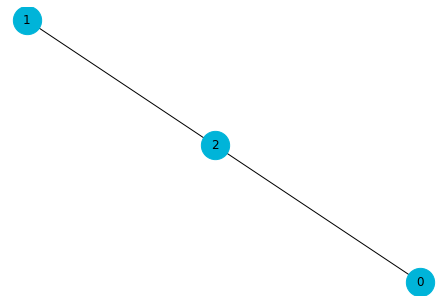

In [24]:
nx.draw(G, with_labels=True, node_size=800,node_color='#00b4d9')

In [25]:
x = np.array([[1,0,0,0],[0,3,0,0] ,[0,1,1,0], [1,0,0,1]])

In [26]:
x

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [27]:
a = sp.csr_matrix(x)

In [28]:
a

<4x4 sparse matrix of type '<class 'numpy.intc'>'
	with 6 stored elements in Compressed Sparse Row format>

In [29]:
for i in a :
    print(i)

  (0, 0)	1
  (0, 1)	3
  (0, 1)	1
  (0, 2)	1
  (0, 0)	1
  (0, 3)	1


In [30]:
a.toarray()

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]], dtype=int32)

In [31]:
Ga = nx.from_scipy_sparse_matrix(a, create_using=nx.Graph())

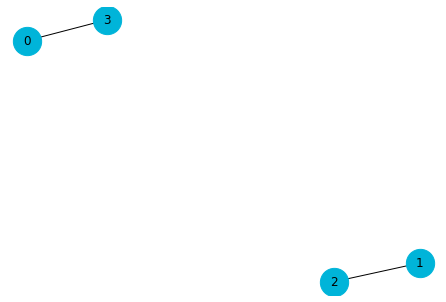

In [32]:
nx.draw(Ga, with_labels=True, node_size=800,node_color='#00b4d9')

In [33]:
GA = nx.from_scipy_sparse_matrix(a, parallel_edges=True,create_using=nx.MultiDiGraph())

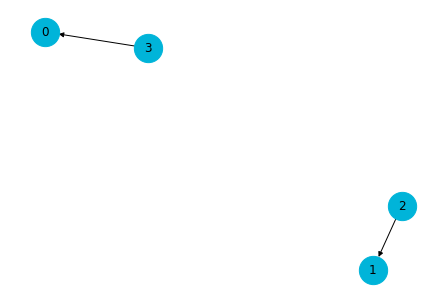

In [34]:
nx.draw(GA, with_labels=True, node_size=800,node_color='#00b4d9')

### csc

In [35]:
b = sp.csc_matrix(x)

In [36]:
b

<4x4 sparse matrix of type '<class 'numpy.intc'>'
	with 6 stored elements in Compressed Sparse Column format>

In [37]:
for i in b :
    print(i)

  (0, 0)	1
  (0, 1)	3
  (0, 1)	1
  (0, 2)	1
  (0, 0)	1
  (0, 3)	1


In [38]:
b.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]], dtype=int32)

### lil

In [39]:
c = sp.lil_matrix((4,4))

In [40]:
c

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in List of Lists format>

In [41]:
c.data

array([list([]), list([]), list([]), list([])], dtype=object)

In [42]:
c[0,0] = 1

In [43]:
c[1,1] = 1

In [44]:
c[2,2] = c[2,1] = 1

In [45]:
c[3,3] = c[3,0] = 1

In [46]:
c.todense()

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [47]:
Gc = nx.from_scipy_sparse_matrix(c, create_using=nx.Graph())

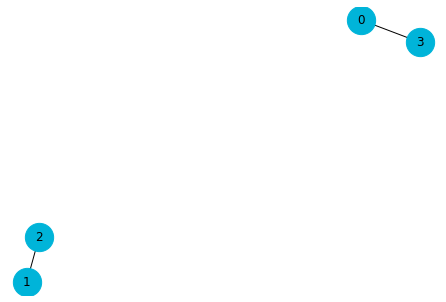

In [48]:
nx.draw(Gc, with_labels=True, node_size=800,node_color='#00b4d9')